In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Import the dataset of 1,600,000 tweets. The dataset is from https://www.kaggle.com/datasets/kazanova/sentiment140.

# Exploratory Data Analysis

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\twitter.csv', header=None, 
                 usecols=[0, 2, 4, 5], names=['target', 'date', 'user', 'tweet'])

In [3]:
df.head()

,target,date,user,tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


Note that the target columns have 2 values: 0 and 4, which represents negative and positive tweets, respectively.

In [4]:
df.target.unique()

array([0, 4], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   date    1600000 non-null  object
 2   user    1600000 non-null  object
 3   tweet   1600000 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


For the sake of time, let's only take a sample of 10,000 rows from the dataset.

In [6]:
df = df.sample(10000)

Don't forget to rename our indexes

In [7]:
df.reset_index(drop=True, inplace=True)

Now, first convert empty strings into nan values and then drop them.

In [8]:
df.tweet.replace(('', ' ', '  '), np.nan, inplace=True)
df.dropna(subset=['tweet'], inplace=True)

Perform the same technique for the user column

In [9]:
df.user.replace(('', ' '), np.nan, inplace=True)
df.dropna(subset=['user'], inplace=True)

Find the number of different users that have tweets in the dataset

In [10]:
user_number = df.user.nunique()
print(f"we have a total of {user_number} users.")

we have a total of 9705 users.


Convert the date column into datetime type

In [11]:
df.date = pd.to_datetime(df.date)

C:\Users\Lenovo\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [12]:
df.date

0      2009-05-18 05:23:44
1      2009-06-05 12:42:34
2      2009-04-19 12:15:53
3      2009-05-31 10:45:00
4      2009-06-01 04:39:34
               ...        
9995   2009-06-06 17:14:18
9996   2009-05-30 03:38:37
9997   2009-04-19 10:45:25
9998   2009-06-01 09:19:48
9999   2009-05-31 00:09:52
Name: date, Length: 10000, dtype: datetime64[ns]

Remove the duplicated tweets

In [140]:
df = df.drop_duplicates(subset=['tweet'])

,target,date,user,tweet,len
0,4,2009-05-18 05:23:44,AmberAusten,Goooood morning,16
1,4,2009-06-05 12:42:34,Berechitax,mariaforreals hahahaha well r lot ppl think,44
2,0,2009-04-19 12:15:53,haleyashe,got 9 hour week work,21
3,0,2009-05-31 10:45:00,captionhunt,Discovery hosting great show called quotNature...,109
4,4,2009-06-01 04:39:34,bryancheung,Installing Linux Parallels,27
...,...,...,...,...,...
9995,0,2009-06-06 17:14:18,KLoeff,found yet another line dance cant figure Im old,48
9996,0,2009-05-30 03:38:37,kristianramirez,hotsoul Whatever cant appreciate good Cinema,45
9997,4,2009-04-19 10:45:25,Ingvild1211,MoisesArias yay absolutetutely cant wait Haha ...,70
9998,4,2009-06-01 09:19:48,xxxTrisHxxx,Yay Even better save hahaKbabycakes long ur g...,79


Find the percantage of tweets that are starting with '@' symbol, i.e. that are reply tweets

In [14]:
reply = 0
for word in df.tweet:
    if word[0] == '@':
        reply += 1
        
print(f"The reply tweets are about {round(reply / len(df.tweet) * 100)}% of the total tweets.")        

The reply tweets are about 43% of the total tweets.


Who are the top 10 users who tweeted most?

In [15]:
df.groupby('user').tweet.count().sort_values(ascending=False).head(10)

user
funkyfairy24       5
thisgoeshere       4
DarrenRuane        3
hollyalyxfinch     3
Broooooke_         3
tweetpet           3
howlieT            3
AblativMeatshld    3
melody             3
buddhapest         3
Name: tweet, dtype: int64

The number of tweets for each target 

In [16]:
print(f'There are {len(df[df.target == 4])} positive tweets and {len(df[df.target == 0])} negative tweets.')

There are 5039 positive tweets and 4960 negative tweets.


Create a new column that demonstrates the length of each tweet

In [17]:
df['len'] = df.tweet.apply(lambda x: len(str(x)))
df.sample(5)

,target,date,user,tweet,len
6678,4,2009-04-06 23:57:45,krossfire,"@BlegooPR It was a quote , a mere quote",40
4523,0,2009-06-18 16:31:26,RParker11,I need to win the lottery so I can stay home w...,61
6067,0,2009-06-02 06:56:51,Hollywelch,@Joejonaslooover yeah both were really hard i...,56
1500,0,2009-06-21 06:31:46,Jabberjawz,I think I divulged too much information about ...,131
4723,0,2009-06-23 15:16:54,ruebluestar192,i wanna go home,16


What is the average value and the standard deviation for the length of the tweets?

In [18]:
avg_len = round(np.mean(df.len))
sd_len = round(np.std(df.len), 2)
print(f"The tweets contain {avg_len} characters in average and have standard deviation {sd_len}.")

The tweets contain 74 characters in average and have standard deviation 36.23.


Display the histograms for columns

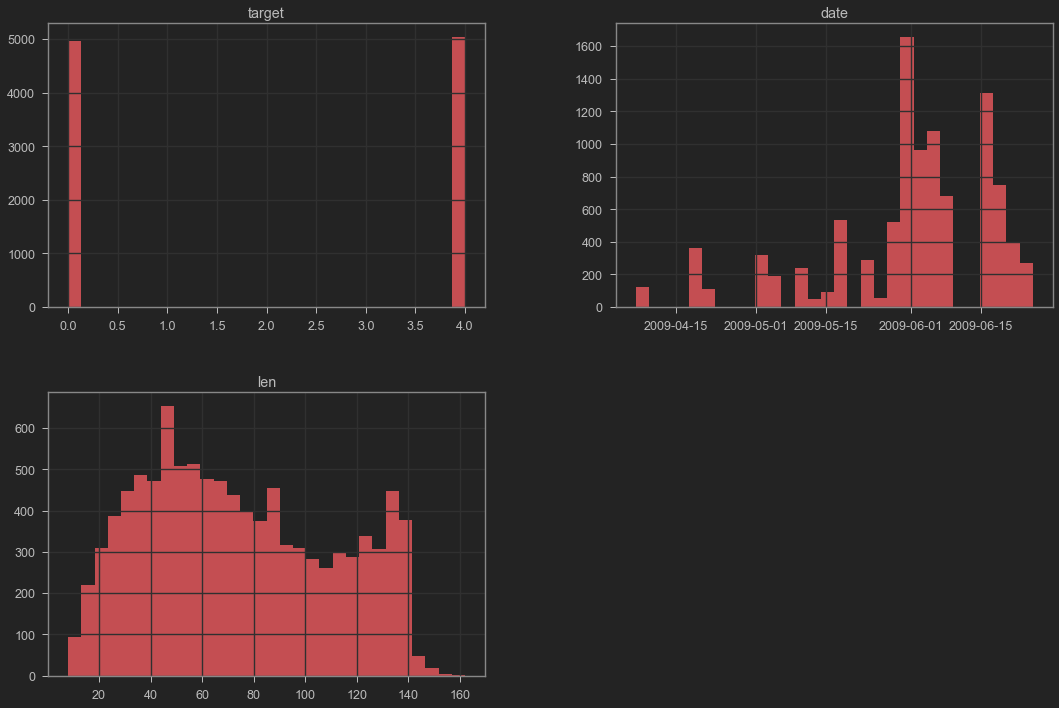

In [19]:
df.hist(bins=30, figsize=(18,12), color='r');

Some comments on the histograms: <br>
The positive and negative tweets are almost equal to each other as we have shown. <br>
There are some days in which there are no tweets in the dataset. <br>
The length of the tweets have a large deviation (35), and tend to uniformly disrubute rather than normally distribute.

Show that there is no tweet for 2009-04-15 although it is in the range of the date. 

In [40]:
min_date = min(df.date)
max_date = max(df.date)
print(f"The range of the date is from {min_date} to {max_date}.")
print("The tweets for 2009-04-15:", df.loc[df.date == '2009-04-15'])

The range of the date is from 2009-04-06 22:23:06 to 2009-06-25 10:28:05.
The tweets for 2009-04-15: Empty DataFrame
Columns: [target, date, user, tweet, len]
Index: []


In [21]:
df.len.describe()

count    9999.000000
mean       74.020902
std        36.230747
min         8.000000
25%        44.000000
50%        69.000000
75%       103.000000
max       162.000000
Name: len, dtype: float64

# the Wordcloud

Create series that has only positive or negative tweets.

In [22]:
positive = df[df.target == 4]
negative = df[df.target == 0]

Convert tweets into a single string

In [23]:
sentences = df.tweet.tolist()
len(sentences)

9999

In [24]:
sentences_str = ' '.join(sentences)
sentences_str[:200]

'Goooood morning  @mariaforreals hahahaha well we r a lot of ppl that think the same!  I only got 9 hour this week for work!  Discovery is hosting a great show called &quot;Natures Most Amazing Events&'

In [25]:
!pip install WordCloud
from wordcloud import WordCloud

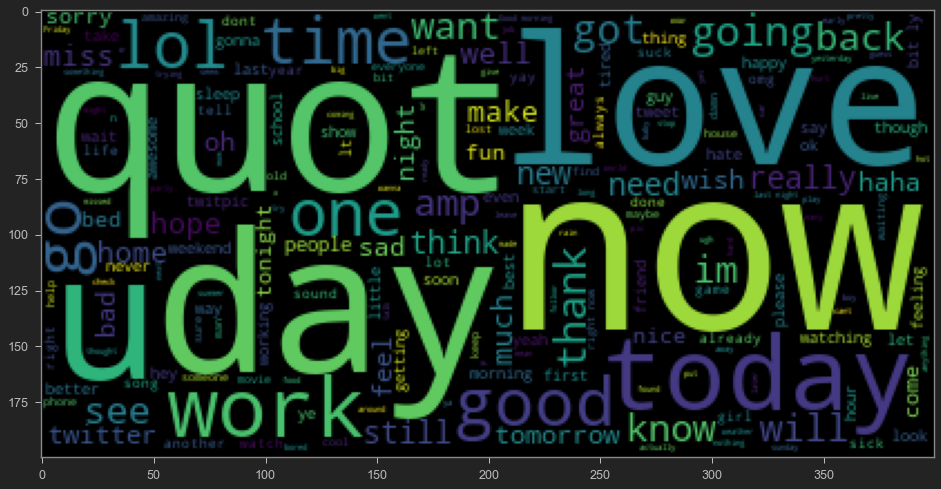

In [26]:
plt.figure(figsize=(16, 12))
plt.imshow(WordCloud().generate(sentences_str))

Now, plot the wordcloud for the negative dataframe

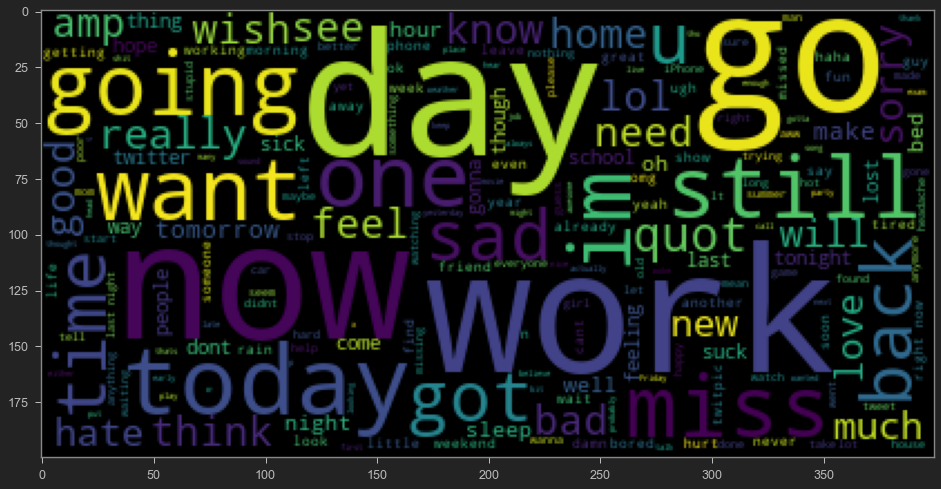

In [27]:
neg_sentences = negative.tweet.tolist()
neg_str = ' '.join(neg_sentences)

plt.figure(figsize=(16, 12))
plt.imshow(WordCloud().generate(neg_str))

# Data Cleaning 

## Remove Punctuation

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Remove punctuation from the tweets 

In [30]:
for tweet in df.tweet:
    new_list = [char for char in tweet if char not in string.punctuation]
    new_tweet = ''.join(new_list)
    df.tweet[df.tweet == tweet] = new_tweet

<ipython-input-30-af1f3c398f7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tweet[df.tweet == tweet] = new_tweet


In [31]:
df.sample(10)

,target,date,user,tweet,len
9548,4,2009-06-05 22:32:18,giz_zellie,hello for a little bit twitterbugs miss you all,49
1492,0,2009-06-18 14:44:49,haleyfayej,my poor doggy is blind and has walked into wal...,82
5056,0,2009-06-20 09:59:57,jasonnoble,Playing with tweetdeck on the iphone Crashed ...,63
6805,0,2009-06-19 03:59:27,UKbabz,wheres the sun,16
1755,4,2009-06-05 23:16:46,xjaymarie,duvi I saw the original 1974 version of this m...,134
3143,4,2009-06-06 19:42:34,lexa_joy,AlexAllTimeLowPreordered the ATL album yay,47
358,0,2009-06-05 08:34:32,KamDiggity,there was no storm,19
4,4,2009-06-01 04:39:34,bryancheung,Installing Linux through Parallels now,40
6358,4,2009-06-16 06:02:39,chiefsittinduck,emmabung ah thats not so bad not all of summer...,79
5890,4,2009-06-02 20:46:17,AprilFilms,had the most wonderful most heart warming conv...,134


# Remove the Stopwords

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Remove the stopwords from the tweets in our dataset.

In [34]:
for tweet in df.tweet:
    word_list = tweet.split(' ')
    new_list = [char for char in word_list if char.lower() not in stopwords.words('english')]
    new_tweet = ' '.join(new_list)
    df.tweet[df.tweet == tweet] = new_tweet

<ipython-input-34-fdd38ca4684c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tweet[df.tweet == tweet] = new_tweet


Note that as we removed the punctuations and the stopwords, let's update our length column as well

In [35]:
df.len = df.tweet.apply(len)

# Tokenization (Count Vectorization)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.tweet)

How many unique cleaned words do we have after all?

In [63]:
(f'There are {X.shape[1]} unique non-stopword words in the tweets')

'There are 19647 unique non-stopword words in the tweets'

Although we can perform count vectorization on the tweets, this would yield an extremely large feature names and vectorizer arrays. The codes for those task are still provided below. 

In [64]:
features = vectorizer.get_feature_names()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
vectorizer_array = X.toarray()

Notice that the vectorizer array has the same shape as X 

In [66]:
print(f"X's shape is {X.shape}")
print(f"the array's shape is {vectorizer_array.shape}")

X's shape is (9999, 19647)
the array's shape is (9999, 19647)


# Naive Bayes Classifier

In [67]:
from sklearn.model_selection import train_test_split

y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Display the confusion matrix

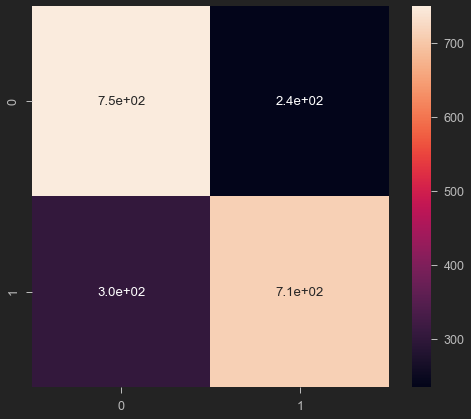

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

predictions = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True);

In [134]:
predictions = nb_classifier.predict(X_test)

Classification Results 

In [136]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       984
           4       0.75      0.70      0.72      1016

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [139]:
accuracy_score(y_test, predictions)

0.73